| 4/27/23, 9:39 PM | DL1_B213021.ipynb - Colaboratory |
|------------------|----------------------------------|

| \# Importing libraries |
|------------------------|

> import numpy as np  
> import pandas as pd  
> import tensorflow as tf
>
> from sklearn.model_selection import train_test_split  
> from sklearn.preprocessing import StandardScaler  
> from sklearn.metrics import r2_score
>
> \# Loading the Boston Housing dataset  
> boston_dataset = pd.read_csv('Boston.csv')  
> boston = pd.DataFrame(boston_dataset,
> columns=boston_dataset.columns)  
> boston\['MEDV'\] = boston_dataset\['medv'\]
>
> boston_dataset.shape
>
> (506, 16)
>
> print(boston_dataset.head(5))
>
> Unnamed: 0 crim zn indus chas nox rm age dis rad \\ 0 1 0.00632 18.0
> 2.31 0 0.538 6.575 65.2 4.0900 1 1 2 0.02731 0.0 7.07 0 0.469 6.421
> 78.9 4.9671 2 2 3 0.02729 0.0 7.07 0 0.469 7.185 61.1 4.9671 2 3 4
> 0.03237 0.0 2.18 0 0.458 6.998 45.8 6.0622 3 4 5 0.06905 0.0 2.18 0
> 0.458 7.147 54.2 6.0622 3
>
> tax ptratio black lstat medv MEDV  
> 0 296 15.3 396.90 4.98 24.0 24.0  
> 1 242 17.8 396.90 9.14 21.6 21.6  
> 2 242 17.8 392.83 4.03 34.7 34.7  
> 3 222 18.7 394.63 2.94 33.4 33.4  
> 4 222 18.7 396.90 5.33 36.2 36.2
>
> print(np.shape(boston_dataset))
>
> (506, 16)
>
> print(boston_dataset.describe())
>
> Unnamed: 0 crim zn indus chas nox \\ count 506.000000 506.000000
> 506.000000 506.000000 506.000000 506.000000 mean 253.500000 3.613524
> 11.363636 11.136779 0.069170 0.554695 std 146.213884 8.601545
> 23.322453 6.860353 0.253994 0.115878 min 1.000000 0.006320 0.000000
> 0.460000 0.000000 0.385000 25% 127.250000 0.082045 0.000000 5.190000
> 0.000000 0.449000 50% 253.500000 0.256510 0.000000 9.690000 0.000000
> 0.538000 75% 379.750000 3.677083 12.500000 18.100000 0.000000 0.624000
> max 506.000000 88.976200 100.000000 27.740000 1.000000 0.871000
>
> rm age dis rad tax ptratio \\ count 506.000000 506.000000 506.000000
> 506.000000 506.000000 506.000000 mean 6.284634 68.574901 3.795043
> 9.549407 408.237154 18.455534 std 0.702617 28.148861 2.105710 8.707259
> 168.537116 2.164946 min 3.561000 2.900000 1.129600 1.000000 187.000000
> 12.600000 25% 5.885500 45.025000 2.100175 4.000000 279.000000
> 17.400000 50% 6.208500 77.500000 3.207450 5.000000 330.000000
> 19.050000 75% 6.623500 94.075000 5.188425 24.000000 666.000000
> 20.200000 max 8.780000 100.000000 12.126500 24.000000 711.000000
> 22.000000
>
> black lstat medv MEDV  
> count 506.000000 506.000000 506.000000 506.000000  
> mean 356.674032 12.653063 22.532806 22.532806  
> std 91.294864 7.141062 9.197104 9.197104  
> min 0.320000 1.730000 5.000000 5.000000  
> 25% 375.377500 6.950000 17.025000 17.025000  
> 50% 391.440000 11.360000 21.200000 21.200000  
> 75% 396.225000 16.955000 25.000000 25.000000  
> max 396.900000 37.970000 50.000000 50.000000
>
> \# Split the data into training and testing sets  
> X = boston.drop('MEDV', axis=1)  
> Y = boston\['MEDV'\]  
> X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
> test_size=0.2, random_state=1)

| https://colab.research.google.com/drive/1u5vugtpkCI0i0o6O73vY4tR-Lz5i2-GJ#printMode=true | 1/4 |
|------------------------------------|------------------------------------|

4/27/23, 9:39 PM DL1_B213021.ipynb - Colaboratory

> \# Scale the data  
> scaler = StandardScaler()  
> X_train_scaled = scaler.fit_transform(X_train)  
> X_test_scaled = scaler.transform(X_test)
>
> \# Define the model  
> model = tf.keras.models.Sequential(\[  
> tf.keras.layers.Dense(64, activation='relu',
> input_shape=(X_train.shape\[1\],)), tf.keras.layers.Dense(64,
> activation='relu'),  
> tf.keras.layers.Dense(1)  
> \])
>
> \# Compile the model  
> model.compile(optimizer='adam', loss='mse')
>
> \# Train the model  
> history = model.fit(X_train_scaled, Y_train,
> validation_data=(X_test_scaled, Y_test), epochs=100)

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>Epoch 1/100<br />
13/13 [==============================] - 2s 22ms/step - loss: 579.7935 -
val_loss: 566.8345 Epoch 2/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 519.9058 -
val_loss: 499.8945 Epoch 3/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 446.0014 -
val_loss: 410.6792 Epoch 4/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 346.0971 -
val_loss: 295.0309 Epoch 5/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 228.5537 -
val_loss: 172.4942 Epoch 6/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 117.2006 -
val_loss: 86.2677 Epoch 7/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 60.7959 -
val_loss: 50.8605 Epoch 8/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 41.9353 -
val_loss: 37.0392 Epoch 9/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 31.4906 -
val_loss: 27.4767 Epoch 10/100<br />
13/13 [==============================] - 0s 3ms/step - loss: 24.2087 -
val_loss: 21.7079 Epoch 11/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 19.9854 -
val_loss: 18.1820 Epoch 12/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 17.1946 -
val_loss: 15.7325 Epoch 13/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 15.0696 -
val_loss: 14.0107 Epoch 14/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 13.4463 -
val_loss: 12.7971 Epoch 15/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 12.3516 -
val_loss: 11.7113 Epoch 16/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 11.1735 -
val_loss: 10.7977 Epoch 17/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 10.3415 -
val_loss: 10.2638 Epoch 18/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 9.5420 -
val_loss: 9.5540 Epoch 19/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 8.9082 -
val_loss: 9.0734 Epoch 20/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 8.3447 -
val_loss: 8.7130 Epoch 21/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 7.7903 -
val_loss: 8.1594 Epoch 22/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 7.3412 -
val_loss: 7.7143 Epoch 23/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 6.9347 -
val_loss: 7.3838 Epoch 24/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 6.5723 -
val_loss: 7.0898 Epoch 25/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 6.2431 -
val_loss: 6.6430 Epoch 26/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 5.9225 -
val_loss: 6.4520 Epoch 27/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 5.6786 -
val_loss: 6.1964 Epoch 28/100<br />
13/13 [==============================] - 0s 4ms/step - loss: 5.3824 -
val_loss: 5.9290 Epoch 29/100<br />
13/13 [==============================] - 0s 3ms/step - loss: 5.1993 -
val_loss: 5.7668</p>
</blockquote></th>
<th>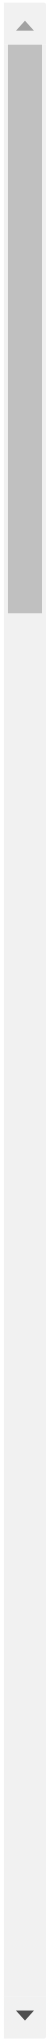</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \# Evaluate the model  
> Y_pred = model.predict(X_test_scaled)  
> r2 = r2_score(Y_test, Y_pred)  
> print("R^2 score:", r2)
>
> 4/4 \[==============================\] - 0s 2ms/step  
> R^2 score: 0.987125595222069

https://colab.research.google.com/drive/1u5vugtpkCI0i0o6O73vY4tR-Lz5i2-GJ#printMode=true
2/4

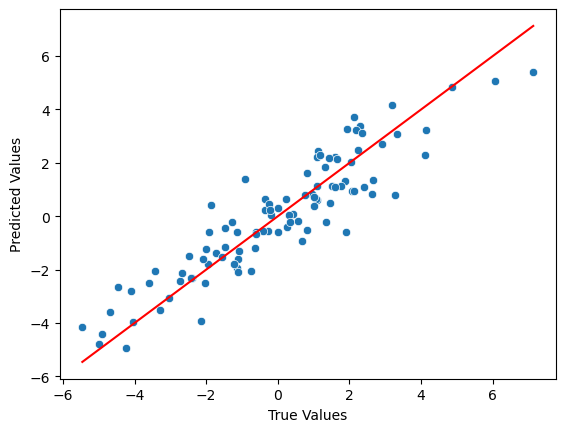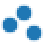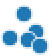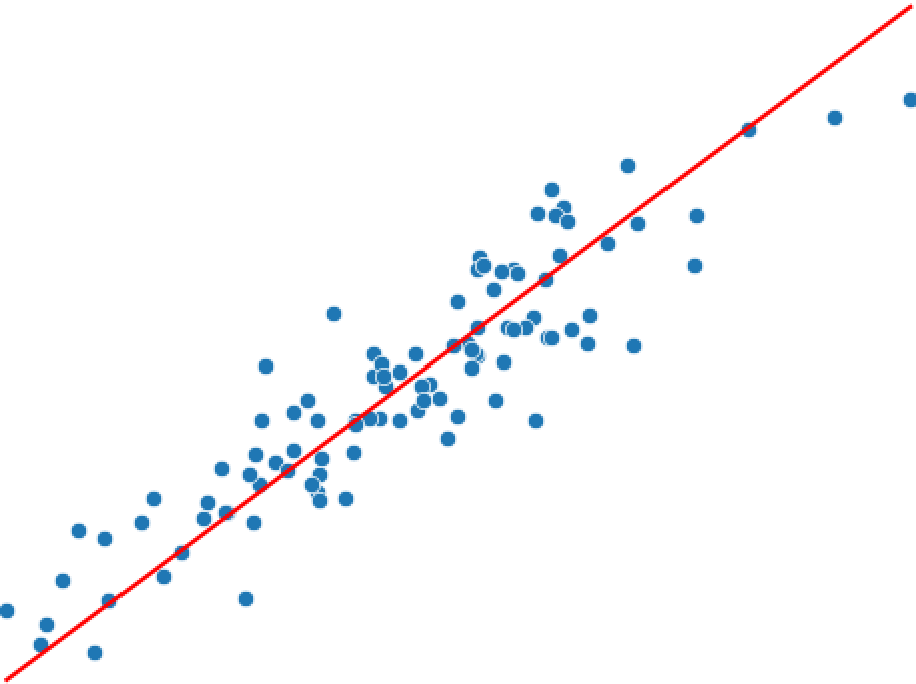

4/27/23, 9:39 PM DL1_B213021.ipynb - Colaboratory

> import numpy as np  
> import seaborn as sns
>
> \# Generate some sample data  
> X = np.random.normal(0, 1, 100)  
> Y = 2 \* X + np.random.normal(0, 1, 100)
>
> \# Fit a linear regression model  
> model = np.polyfit(X, Y, 1)
>
> \# Make predictions on the training data  
> Y_pred = np.polyval(model, X)
>
> \# Add axis labels  
> plt.xlabel('True Values')  
> plt.ylabel('Predicted Values')
>
> \# Create a scatter plot of predicted vs true values  
> sns.scatterplot(np.squeeze(Y), np.squeeze(Y_pred))
>
> \# Add a diagonal line to show perfect correlation  
> sns.lineplot(np.squeeze(Y), np.squeeze(Y), color='red')
>
> C:\Users\D_COMP_RSL-14\anaconda3\lib\site-packages\seaborn\\\_decorators.py:36:
> FutureW warnings.warn(  
> C:\Users\D_COMP_RSL-14\anaconda3\lib\site-packages\seaborn\\\_decorators.py:36:
> FutureW warnings.warn(  
> \<AxesSubplot:xlabel='True Values', ylabel='Predicted Values'\>
>
> <img
> src="attachment:vertopal_daa9708067d54fddb1ba9e56fa5ef208/media/image2.png"
> style="width:4.55556in;height:0.15278in" />

\-

https://colab.research.google.com/drive/1u5vugtpkCI0i0o6O73vY4tR-Lz5i2-GJ#printMode=true
3/4

| 4/27/23, 9:39 PM | DL1_B213021.ipynb - Colaboratory |
|------------------|----------------------------------|



| https://colab.research.google.com/drive/1u5vugtpkCI0i0o6O73vY4tR-Lz5i2-GJ#printMode=true | 4/4 |
|------------------------------------|------------------------------------|
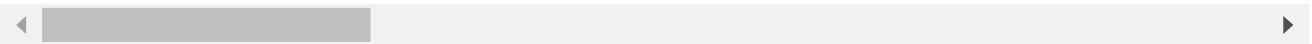